https://bit.ly/DSN-7-ab

#  Дисперсионный анализ


<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>



In [ ]:
# Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns


Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


In [ ]:
grand_mean

4.0

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
30.0=24.0+6.0


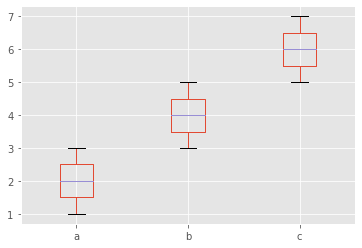

In [ ]:
# Выборки которые надо сравнить
data = pd.DataFrame({
        'a': [3, 1, 2],
        'b': [5, 3, 4],
        'c': [7, 6, 5]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')

# общая средняя
grand_mean = data.values.mean()

# Общая сумма квадратов sst = ssb + ssw
sst = ((data - grand_mean)**2).values.sum()

# отклонение групповых средний от общей средней
ssb = (data.count(axis=0) * (data.mean(axis=0) - grand_mean) ** 2).values.sum()

# отклонения значений внутри группы от средней группы
ssw = ((data - data.mean(axis=0)) ** 2).values.sum()

print(f'{sst}={ssb}+{ssw}')

$$ MS_{within} = \frac{SS_{within}}{N-k} $$
$$ MS_{between} = \frac{SS_{between}}{k-1} $$
$$ F = \frac{MS_{between}}{MS_{within}} $$

In [ ]:
groups = data.shape[1]

# межгрупповой средний квадрат
dfb = groups - 1
msb = ssb/dfb

# внутригрупповой средний квадрат
dfw = data.size - groups
msw = ssw/dfw

f_value = msb/msw

p = stats.f.sf(f_value, dfb, dfw)
print(f'Результат: (pvalue = {p})')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное f-значение {f_value}")

Результат: (pvalue = 0.008000000000000002)
отклоняем нулевую гипотезу
Полученное f-значение 12.0


In [ ]:
[*data.values.T]

[array([3, 1, 2]), array([5, 3, 4]), array([7, 6, 5])]

In [ ]:
stats.f_oneway(*data.values.T)

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

<img src='https://drive.google.com/uc?id=1SM_uGauFjQsVtHqQQWagdx3d8GVpb-n7'>

Посмотрим, на распределение в нашем случае
- https://gallery.shinyapps.io/dist_calc/ 



### Задача 1.1
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам. Какие выводы можно сделать, понаблюдав за тем, как распределены данные и что показывают тесты?

In [ ]:
df = pd.DataFrame([[25, 45, 30, 54],
                   [30, 55, 29, 60],
                   [28, 29, 33, 51],
                   [36, 56, 37, 62],
                   [29, 40, 27, 73]],
                   columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


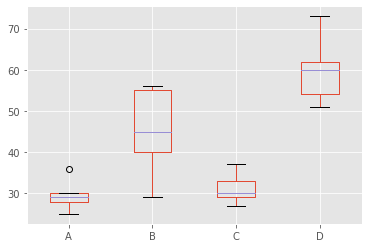

In [ ]:
# Н0 A=B=C=D
# H1 !(A=B=C=D)
df.boxplot()
# графически видно, что более менее похожи группы A - C .
# все остальные не имеют ничего общего => H0 отклоняется

In [ ]:
# докажем тоже статистически
# общее среднее
grand_mean = df.values.mean()

# Общая сумма квадратов sst = ssb + ssw
sst = ((df - grand_mean)**2).values.sum()

# отклонение групповых средний от общей средней
ssb = (df.count(axis=0) * (df.mean(axis=0) - grand_mean) ** 2).values.sum()

# отклонения значений внутри группы от средней группы
ssw = ((df - df.mean(axis=0)) ** 2).values.sum()

print(f'{sst}={ssb}+{ssw}')

3928.95=3010.95+918.0


In [ ]:
groups = df.shape[1]

# межгрупповой средний квадрат
dfb = groups - 1
msb = ssb/dfb

# внутригрупповой средний квадрат
dfw = df.size - groups
msw = ssw/dfw

f_value = msb/msw

p = stats.f.sf(f_value, dfb, dfw)
print(f'Результат: (pvalue = {p})')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное f-значение {f_value}")

Результат: (pvalue = 2.639241146210922e-05)
отклоняем нулевую гипотезу
Полученное f-значение 17.492810457516338


In [ ]:
# и в случае f_oneway получаем те же значения.
# с увереностью отклоняем Н0
# ВЫВЫОД: графически мы не обманулись
[*df.values.T]
stats.f_oneway(*df.values.T)
# [*df.values.T]

F_onewayResult(statistic=17.492810457516338, pvalue=2.639241146210922e-05)

### Задача 1.2    
    
Есть данные об измерении раковины у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


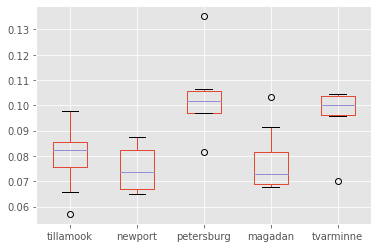

In [ ]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]
Mytilus_trossulus = pd.DataFrame([tillamook,newport, petersburg, magadan, tvarminne],
                                 index =['tillamook', 'newport', 'petersburg', 'magadan', 'tvarminne'], )
Mytilus_trossulus.T.boxplot();


In [ ]:
# по графику видно что данные можно разделить на две группы:
# 1 - 'tillamook', 'newport', 'magadan'
# 2 -  = ['petersburg', 'tvarminne']

Mytilus_trossulus_1 = Mytilus_trossulus.T[['tillamook', 'newport', 'magadan']]
Mytilus_trossulus_2 = Mytilus_trossulus.T[['petersburg', 'tvarminne']]

In [ ]:
Mytilus_trossulus_T = Mytilus_trossulus.T
Mytilus_trossulus_T['newport'].fillna(Mytilus_trossulus_T['newport'].mean(),inplace = True)
Mytilus_trossulus_T['petersburg'].fillna(Mytilus_trossulus_T['petersburg'].mean(),inplace = True)
Mytilus_trossulus_T['magadan'].fillna(Mytilus_trossulus_T['magadan'].mean(),inplace = True)
Mytilus_trossulus_T['tvarminne'].fillna(Mytilus_trossulus_T['tvarminne'].mean(),inplace = True)
statistic, p = stats.f_oneway(*Mytilus_trossulus_T.values.T)
if p < 0.05:
    print('отклоняем нулевую гипотезу')
print(f'stat = {statistic}, p_val = {p}')    

отклоняем нулевую гипотезу
stat = 12.935000371027442, p_val = 4.3272866417232293e-07


In [ ]:
# теперь сравнение внутри каждой группы
# _1
# Mytilus_trossulus_1
# stats.f_oneway(*Mytilus_trossulus_1.values.T)
# Mytilus_trossulus
Mytilus_trossulus_1

,tillamook,newport,magadan
0,0.0571,0.0873,0.1033
1,0.0813,0.0662,0.0915
2,0.0831,0.0672,0.0781
3,0.0976,0.0819,0.0685
4,0.0817,0.0749,0.0677
5,0.0859,0.0649,0.0697
6,0.0735,0.0835,0.0764
7,0.0659,0.0725,0.0689
8,0.0923,NaN,NaN
9,0.0836,NaN,NaN


In [ ]:
Mytilus_trossulus_1['newport'].fillna(Mytilus_trossulus_1['newport'].mean(), inplace = True)
Mytilus_trossulus_1['magadan'].fillna(Mytilus_trossulus_1['magadan'].mean(), inplace = True)

Mytilus_trossulus_1

,tillamook,newport,magadan
0,0.0571,0.0873,0.103300
1,0.0813,0.0662,0.091500
2,0.0831,0.0672,0.078100
3,0.0976,0.0819,0.068500
4,0.0817,0.0749,0.067700
5,0.0859,0.0649,0.069700
6,0.0735,0.0835,0.076400
7,0.0659,0.0725,0.068900
8,0.0923,0.0748,0.078012
9,0.0836,0.0748,0.078012


In [ ]:
statistic, p = stats.f_oneway(*Mytilus_trossulus_1.values.T)
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f'stat = {statistic}, p_val = {p}')

НЕ отклоняем нулевую гипотезу
stat = 0.6687930467905053, p_val = 0.5206097606962756


In [ ]:
Mytilus_trossulus_2

,petersburg,tvarminne
0,0.0974,0.0703
1,0.1352,0.1026
2,0.0817,0.0956
3,0.1016,0.0973
4,0.0968,0.1039
5,0.1064,0.1045
6,0.1050,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [ ]:
Mytilus_trossulus_2_del = Mytilus_trossulus_2.dropna(how='all')
# Mytilus_trossulus_2_del['tvarminne'].filna(, inplace = True)
Mytilus_trossulus_2_del
Mytilus_trossulus_2_del['tvarminne'].fillna(Mytilus_trossulus_2_del['tvarminne'].mean(),inplace = True)
Mytilus_trossulus_2_del

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,petersburg,tvarminne
0,0.0974,0.0703
1,0.1352,0.1026
2,0.0817,0.0956
3,0.1016,0.0973
4,0.0968,0.1039
5,0.1064,0.1045
6,0.1050,0.0957


In [ ]:
statistic, p = stats.f_oneway(*Mytilus_trossulus_2_del.values.T)
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f'stat = {statistic}, p_val = {p}')

НЕ отклоняем нулевую гипотезу
stat = 1.0419946699709364, p_val = 0.32749709262608784


In [ ]:
# вывод:
# похожесть выборок внутри 1-ой и 2-ой группе мы не можем исключать
# графический анализ совпадает с расчётными p_val

# Почему мы не можем применить t-критерий для более двух выборок
**применяя его попарно к каждой выборке**

Чтобы выяснить это, сделаем эксперемент.

In [ ]:
from numpy import random
from scipy.stats import t


def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает False'''
    n_samples = samples.shape[0]
  
    for i in range(n_samples):
        for j in range(i+1, n_samples):
           _, p = stats.ttest_ind(samples[:, i], samples[:, j])

           if p < alpha:
              return True
           
    return False


def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия

    repeat - количество повторов
    n_samples - количество выборок в каждом повторе
    sample_size - размер выборки

    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = 0
    for _ in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result += pair_t(samples, alpha)

    pd.Series([result, repeat-result], index=[False, True]).plot.pie(ax=ax, autopct='%.0f%%')
    ax.set_ylabel('')

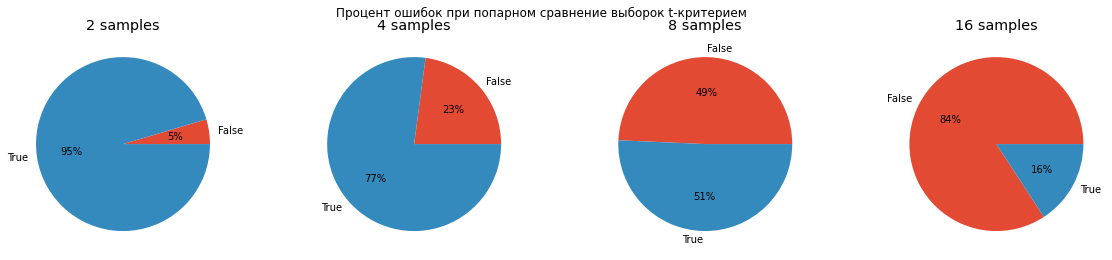

In [ ]:
n_samples = [2, 4, 8, 16]
fig, axs = plt.subplots(ncols=len(n_samples), figsize=(20, 4))

fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(repeat=1000,
                n_samples=n,
                sample_size=30,
                ax=ax)
    ax.set_title(f'{n} samples')

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.

<img src='https://drive.google.com/uc?id=16sIvImkH2BK2n3OUBUWrT4z8QFC4nyL8'>

# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.




### Задание 2.1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.
data = pd.DataFrame({
        'a': A,
        'b': B
    })

statistic, p = stats.f_oneway(*data.values.T)
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f'stat = {statistic}, p_val = {p}')


НЕ отклоняем нулевую гипотезу
stat = 3.0060646842692673, p_val = 0.08451003973499746


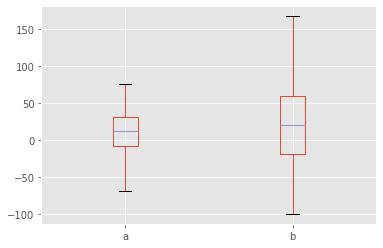

In [ ]:
data.boxplot()
# можно отметить похожесть

### Задание 2.2

Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей до применения препарата.

`B` - та же группа людей, но после применения препарата.

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.
'''
# data совпадает с заданием 2.1
plt.hist(A,bins=10);
plt.hist(B,bins=10,alpha=0.65);
tvalue, pvalue = stats.ttest_ind(A, B)
print(f't_value:{tvalue}, pvalue: {pvalue}')
if pvalue > 0.05:

  print('нет различия в среднем => связь в распределениях есть')
  # что подтверждает гистограма
  '''
# В задании 2.2 две зависимые выборки,
#  поэтому нужно выбирать тест ttest_rel
statistic, p_value = stats.ttest_rel(a=A, b=B)
print(f'p_value = {p_value}')
if p_value < 0.05:
  print('выборки отличаются')  

p_value = 0.03238579156467659
выборки отличаются


### Задание 2.3

Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

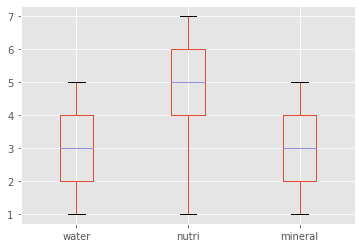

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

# Ваш код.



from statistics import mean
water.append(mean(water))
cucumber = pd.DataFrame({
        'water': water,
        'nutri': nutri,
'mineral' : mineral
                        })

cucumber.boxplot()
# графически видно что nutri показывает результат сильно лучше
# отличия полива минералкой и обычной водой не наблюдаются

In [ ]:
print('Нулевая гипотеза:', '='.join(cucumber))
print('Альтернативная гипотеза:', f'!({"=".join(cucumber)})')

# общая средняя
grand_mean = cucumber.values.mean()

# Общая сумма квадратов sst = ssb + ssw
sst = ((cucumber - grand_mean)**2).values.sum()

# отклонение групповых средний от общей средней
ssb = (cucumber.count(axis=0) * (cucumber.mean(axis=0) - grand_mean) ** 2).values.sum()

# отклонения значений внутри группы от средней группы
ssw = ((cucumber - cucumber.mean(axis=0)) ** 2).values.sum()

print(f'{sst}={ssb}+{ssw}')

Нулевая гипотеза: water=nutri=mineral
Альтернативная гипотеза: !(water=nutri=mineral)
157.71103174603172=47.25626984126986+110.45476190476192


In [ ]:
groups = cucumber.shape[1]

# межгрупповой средний квадрат
dfb = groups - 1
msb = ssb/dfb

# внутригрупповой средний квадрат
dfw = data.size - groups
msw = ssw/dfw

f_value = msb/msw

p = stats.f.sf(f_value, dfb, dfw)
print(f'Результат: (pvalue = {p})')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное f-значение {f_value}")

Результат: (pvalue = 5.811035606452312e-16)
отклоняем нулевую гипотезу
Полученное f-значение 42.141619782572775


### Задание 2.4

Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 



https://drive.google.com/file/d/1hrya27mgyfqLImbOnu7xM4fl6bvRJl6B

In [ ]:
!wget 'https://drive.google.com/uc?id=1hrya27mgyfqLImbOnu7xM4fl6bvRJl6B' -O PlantGrowth.csv

--2022-11-17 08:02:28--  https://drive.google.com/uc?id=1hrya27mgyfqLImbOnu7xM4fl6bvRJl6B
Resolving drive.google.com (drive.google.com)... 142.250.107.138, 142.250.107.100, 142.250.107.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f28rad5vahm02t475msbq7hn7pprjvjo/1668672075000/02611596255248067438/*/1hrya27mgyfqLImbOnu7xM4fl6bvRJl6B?uuid=a6c82f27-f6ad-4719-9c47-d3b50adebfc6 [following]
--2022-11-17 08:02:28--  https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f28rad5vahm02t475msbq7hn7pprjvjo/1668672075000/02611596255248067438/*/1hrya27mgyfqLImbOnu7xM4fl6bvRJl6B?uuid=a6c82f27-f6ad-4719-9c47-d3b50adebfc6
Resolving doc-14-84-docs.googleusercontent.com (doc-14-84-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc

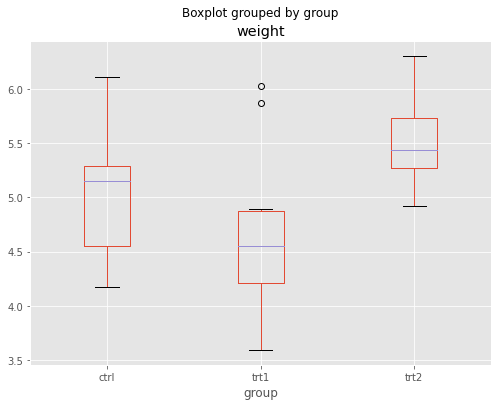

In [ ]:
data = pd.read_csv('PlantGrowth.csv')
data.boxplot('weight', by='group', figsize=(8, 6));

In [ ]:
# агроному посоветую  trt2 уже просто смотря на график.
# тк вес урожая в минимальном случае больше, чем вес максимальных при 
# использовании двух других удобрений =)

'''
В задании 2.4 с PlantGrowth не вижу, 
к сожалению, решения, 
но вижу вывод. 
Здесь можно было бы посмотреть попарную 
разницу между выборками через ttest_ind
 и понять, какой тип удобрений более 
 выигрышный.

 tvalue, pvalue = stats.ttest_ind(A, B)
print(f't_value:{tvalue}, pvalue: {pvalue}')
if pvalue > 0.05:

  print('нет различия в среднем => связь в распределениях есть')
  
'''

# A/B - тесты 
## Cookie Cats 

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

## Данные A/B тестирования

https://drive.google.com/file/d/1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB

In [ ]:
!wget 'https://drive.google.com/uc?id=1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB' -O cookie_cats.csv

--2022-11-17 08:02:29--  https://drive.google.com/uc?id=1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB
Resolving drive.google.com (drive.google.com)... 142.250.107.138, 142.250.107.100, 142.250.107.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k7ekv7ra3gmj6h8gclvlu0l0vdefjs1o/1668672150000/02611596255248067438/*/1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB?uuid=9effc2b1-8653-44d3-ab87-5cb42e65b232 [following]
--2022-11-17 08:02:30--  https://doc-0s-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k7ekv7ra3gmj6h8gclvlu0l0vdefjs1o/1668672150000/02611596255248067438/*/1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB?uuid=9effc2b1-8653-44d3-ab87-5cb42e65b232
Resolving doc-0s-84-docs.googleusercontent.com (doc-0s-84-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc

In [ ]:
data = pd.read_csv('cookie_cats.csv')  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

### Задание 3.1

In [ ]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [ ]:
data.groupby('version').sum()[['sum_gamerounds', 
'retention_1', 'retention_7']]
# не видно отличия показателей в зависимости от уровня ворот
# не имеет значения где их оставить

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,2344795,20034,8502
gate_40,2333530,20119,8279


In [ ]:
data.groupby('version').mean()[['sum_gamerounds', 'retention_1', 'retention_7']]

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,52.456264,0.448188,0.190201
gate_40,51.298776,0.442283,0.182000


In [ ]:
# Ваши выводы
# по среднему тоже можно сделать вывод, что уровень воорт 30 или 40
# не имеет различия

### Задание 3.2

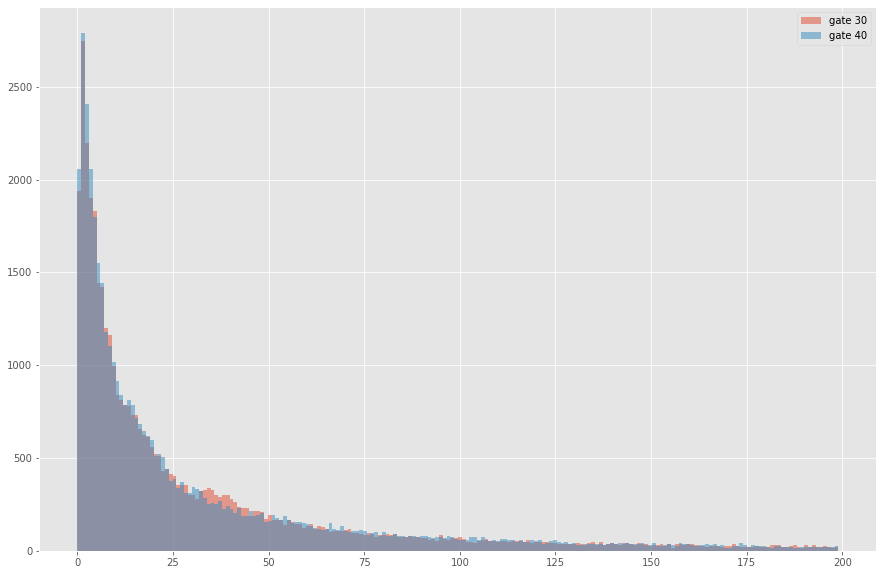

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30[v_30.sum_gamerounds < 200]
v_40 = v_40[v_40.sum_gamerounds < 200]


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=0.5, label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.5, label='gate 40')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Ваши выводы/гипотезы
# то что красные повыше в большем количестве мест
# даёт предположить что присутствие ворот на более раних уровнях 
# быстрее рождает вовлечённость в игру
# а к 40-ому уровню болльшее кол-во наигралось и не продолжает

### Задание 3.3

In [ ]:
# Применяем Bootstrap, чтобы наглядно убедиться в наличии различий
N = 10_000
k = 5_000

X_7 = np.zeros((N, 2))
for i, v in enumerate(['30', '40']):
    v = data[data.version == f'gate_{v}'].retention_7.sample(N*k, replace=True).values.reshape((k, -1))
    print(v.shape)
    X_7[:, i] = v.mean(axis=0)

(5000, 10000)
(5000, 10000)


In [ ]:
# Применяем Bootstrap, чтобы наглядно убедиться в наличии различий
N = 10_000
k = 5_000

X_1 = np.zeros((N, 2))
for i, v in enumerate(['30', '40']):
    v = data[data.version == f'gate_{v}'].retention_1.sample(N*k, replace=True).values.reshape((k, -1))
    print(v.shape)
    X_1[:, i] = v.mean(axis=0)

(5000, 10000)
(5000, 10000)


In [ ]:
X_1.shape 

(10000, 2)

In [ ]:
X_1

array([[0.4334, 0.4362],
       [0.443 , 0.438 ],
       [0.4458, 0.4452],
       ...,
       [0.4476, 0.4428],
       [0.4446, 0.4408],
       [0.4474, 0.438 ]])

In [ ]:
X_7.shape

(10000, 2)

In [ ]:
X_7

array([[0.1982, 0.1756],
       [0.1912, 0.1772],
       [0.1918, 0.1846],
       ...,
       [0.1952, 0.182 ],
       [0.1928, 0.1832],
       [0.207 , 0.1726]])

<Figure size 1296x576 with 0 Axes>

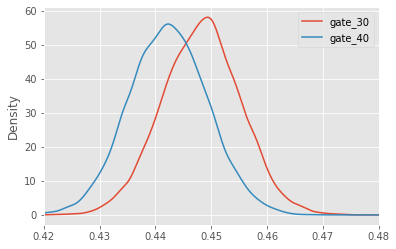

In [ ]:
plt.figure(figsize=(18, 8));
ax = pd.DataFrame(X_1, columns=['gate_30', 'gate_40']).plot(kind='density')
ax.set_xlim(0.42, 0.48);

<Figure size 1296x576 with 0 Axes>

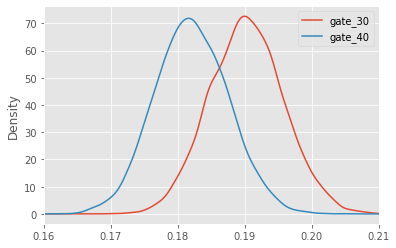

In [ ]:
plt.figure(figsize=(18, 8));
ax = pd.DataFrame(X_7, columns=['gate_30', 'gate_40']).plot(kind='density')
ax.set_xlim(0.16, 0.21);

In [ ]:
# сделайте выводы, используя t-тест
# для retention_1
# p_value = 0.0.8450933110795971 => различия статистически сильны
# выводы повторяют выводы по гистограмме
# к 40-му кровню уже наигрываются и не возвращаются после ожидания следующих открытий

t, p_value = stats.ttest_ind(X_1[0], X_1[1])
t, p_value


(-1.9893137163653791, 0.1849654405727768)

In [ ]:
# сделайте выводы, используя t-тест
# для retention_7
# p_value = 0.5640147311770881 => cсреднее различается сильно
t, p_value = stats.ttest_ind(X_7[0], X_7[1])
t, p_value
# вид распределения повторяет x_1
# более рение ворота лучше для возвращения геймера

(0.20312238104381886, 0.8578297411188678)

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

https://drive.google.com/file/d/1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF

In [ ]:
!wget 'https://drive.google.com/uc?id=1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF' -O pokemon.csv

--2022-11-17 08:02:40--  https://drive.google.com/uc?id=1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF
Resolving drive.google.com (drive.google.com)... 142.250.107.138, 142.250.107.100, 142.250.107.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ebfboa0km5ig4eefjq8dqdk90bmin7r8/1668672150000/02611596255248067438/*/1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF?uuid=f2a08abd-a558-4c15-bec0-56838d3ca2c2 [following]
--2022-11-17 08:02:41--  https://doc-0c-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ebfboa0km5ig4eefjq8dqdk90bmin7r8/1668672150000/02611596255248067438/*/1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF?uuid=f2a08abd-a558-4c15-bec0-56838d3ca2c2
Resolving doc-0c-84-docs.googleusercontent.com (doc-0c-84-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc

In [ ]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задание 4.1
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
pokemon.tail()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,True


In [ ]:
# Ваш код.
pokemon_grass = pokemon[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) | ((pokemon['Class 2'] == 'Grass') &(pokemon['Class 1'] != 'Rock'))]
pokemon_grass

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False
...,...,...,...,...,...,...,...,...,...,...,...
783,784,Pumpkaboo Super Size,Ghost,Grass,59,66,70,44,55,41,False
784,785,Gourgeist Average Size,Ghost,Grass,65,90,122,58,75,84,False
785,786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,False
786,787,Gourgeist Large Size,Ghost,Grass,75,95,122,58,75,69,False


In [ ]:
pokemon_rock = pokemon[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')) | ((pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass'))]
pokemon_rock

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False
149,150,Omanyte,Rock,Water,35,40,100,90,55,35,False
150,151,Omastar,Rock,Water,70,60,125,115,70,55,False
151,152,Kabuto,Rock,Water,30,80,90,55,45,55,False
152,153,Kabutops,Rock,Water,60,115,105,65,70,80,False


In [ ]:
tvalue, pvalue = stats.ttest_ind(pokemon_rock['Attack'], pokemon_grass['Attack'])
print('t_value:',tvalue, '_pvalue: ',pvalue)
if pvalue > 0.05:
  print('нет различия в среднем => связь в распределениях есть')


t_value: 3.729457582692065 _pvalue:  0.00027333381459902653


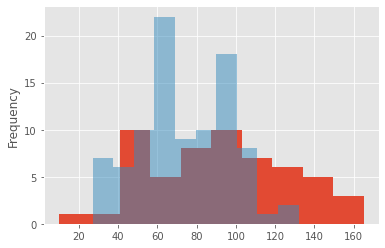

In [ ]:
pokemon_rock['Attack'].plot(kind='hist')
pokemon_grass['Attack'].plot(kind='hist', alpha = 0.5)
#  у rock атака посильнее встречается в большем колличестве случаев, профессор ошибается

### Задание 4.2

Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon_water = pokemon[((pokemon['Class 1'] == 'Water')&(pokemon['Class 2']!= 'Normal'))|((pokemon['Class 2'] == 'Water')&(pokemon['Class 1'] != 'Normal'))]
pokemon_normal = pokemon[((pokemon['Class 1'] == 'Normal')&(pokemon['Class 2'] != 'Water'))|((pokemon['Class 2'] == 'Normal')&(pokemon['Class 1'] != 'Water'))]
pokemon_water

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,False
...,...,...,...,...,...,...,...,...,...,...,...
759,760,Barbaracle,Rock,Water,72,105,115,54,86,68,False
760,761,Skrelp,Poison,Water,50,60,60,60,60,30,False
762,763,Clauncher,Water,NaN,50,53,62,58,63,44,False
763,764,Clawitzer,Water,NaN,71,73,88,120,89,59,False


In [ ]:
tvalue, pvalue = stats.ttest_ind(pokemon_water['Speed'], pokemon_normal['Speed'])
print('t_value:',tvalue, '_pvalue: ',pvalue)
if pvalue > 0.05:
  print('нет различия в среднем => связь в распределениях есть')


t_value: -2.150913330007121 _pvalue:  0.03255353551391033


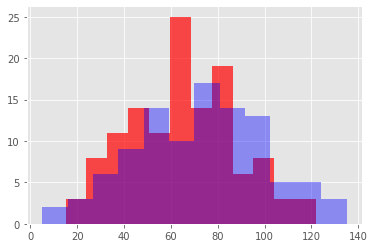

In [ ]:
bins = 12
plt.hist(pokemon_water['Speed'], bins=bins, alpha=0.7, label='pokemon_water',color = 'red');
plt.hist(pokemon_normal['Speed'], bins=bins, alpha=0.4, label='pokemon_normal', color = 'blue');
# надеюсь профессору достаточно рисунка, что бы опровергнуть свою гиптезу. различии в скорости практически не заметны
# ну в состезании на скорость я бы выбрала нормального пакемона

### Задание 4.3

Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']
                    # (pokemon['Name'] in treathed_pokemon)

In [ ]:
pokemon_ouak = pokemon[pokemon['Name'].isin(treathed_pokemon)]
pokemon_ouak

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
pokemon_clean = pokemon[~pokemon['Name'].isin(treathed_pokemon)]
pokemon_clean

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


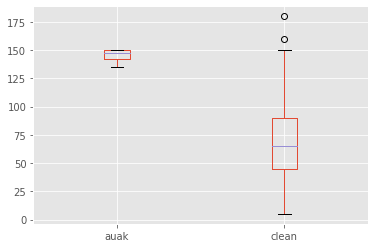

In [ ]:
data = pd.DataFrame({'auak':pokemon_ouak['Speed'],
                     'clean': pokemon_clean['Speed']})
data.boxplot();
# Профессор не просто безумец, но и гений. заставил покемонов бегать быстрее

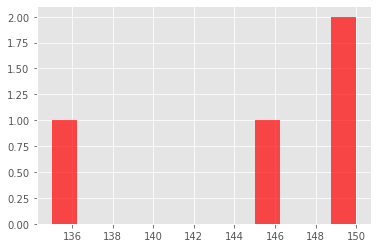

In [ ]:
bins = 12
plt.hist(pokemon_ouak['Speed'], bins=bins, alpha=1, label='pokemon_ouak',color = 'red');
# plt.hist(pokemon_clean['Speed'], bins=bins, alpha=0.4, label='pokemon_clean', color = 'blue');


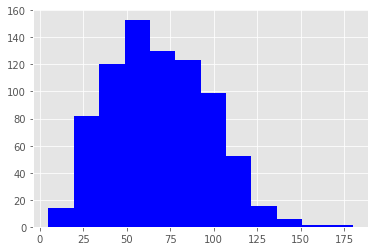

In [ ]:
plt.hist(pokemon_clean['Speed'], bins=bins, alpha=1, label='pokemon_norpokemon_clean', color = 'blue');


### Задание 4.4

Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
# Ваш код.
pok_sum_mul = pokemon.copy()
pok_sum_mul['sum'] = pok_sum_mul['HP'] + pok_sum_mul['Attack'] + pok_sum_mul['Defense']
pok_sum_mul['mul'] = pok_sum_mul['HP'] * pok_sum_mul['Attack'] * pok_sum_mul['Defense']

pok_sum_mul_legend = pok_sum_mul[pok_sum_mul['Legendary'] == True]
pok_sum_mul_ordinary = pok_sum_mul[pok_sum_mul['Legendary'] == False]
pok_sum_mul

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum,mul
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


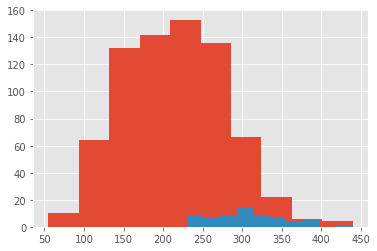

In [ ]:
pok_sum_mul_ordinary['sum'].hist();
pok_sum_mul_legend['sum'].hist();

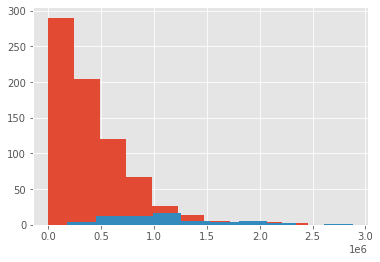

In [ ]:
pok_sum_mul_ordinary['mul'].hist();
pok_sum_mul_legend['mul'].hist();


In [ ]:
# статистика
pok_sum_mul.groupby('Legendary').mean()[['sum', 'mul']]

,sum,mul
Legendary,,
False,214.410884,4.250414e+05
True,309.076923,1.085942e+06


In [ ]:
'''
видно что легендарные соотносятся с лучшей половиной обычных покемонов,
как по сумме, так и по произведению заданных характеристик =)
'''

### Задание 4.5

Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
# Ваш код.
# 1 по силе защиты от других классов (вопрос из лекции)
pokemon_defence = pokemon[(pokemon['Class 1'].isin(best_defence_class)) | (pokemon['Class 2'].isin(best_defence_class))] #189 строк
pokemon_not_defence = pokemon[~(pokemon['Class 1'].isin(best_defence_class)) | (pokemon['Class 2'].isin(best_defence_class))] #696

pokemon_defence

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False
...,...,...,...,...,...,...,...,...,...,...,...
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False
794,795,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95,95,True
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True


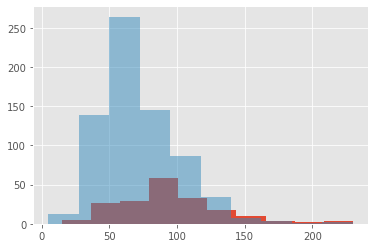

In [ ]:
pokemon_defence['Defense'].hist()
pokemon_not_defence['Defense'].hist(alpha=0.5)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


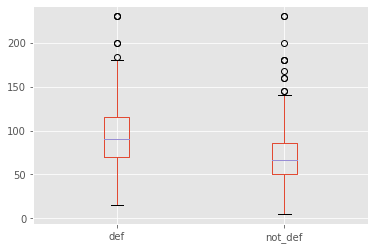

In [ ]:
data = pd.DataFrame({'def':pokemon_defence['Defense'],
                     'not_def': pokemon_not_defence['Defense']})
data.boxplot();
# дейстаительно защита получше у выбранных классов!

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


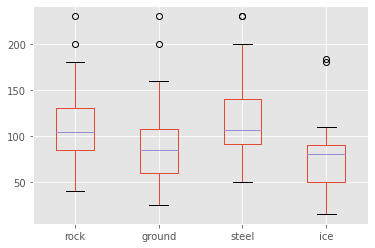

In [ ]:
# 2 не отличаются ли между собой статистически значимо

pok_rock = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
pok_ground = pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
pok_steel = pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]
pok_ice = pokemon[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]
data = pd.DataFrame({
        'rock': pok_rock['Defense'],
        'ground': pok_ground['Defense'],
        'steel': pok_steel['Defense'],
        'ice':pok_ice['Defense']
    })
data.dropna(how='all')
data.boxplot()

In [ ]:
for i in data:
  data[str(i)].fillna(data[str(i)].mean(), inplace = True)

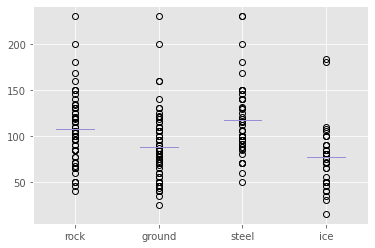

In [ ]:
# после замены отсутствующих значений средним, бокс плот превретился в набор страннах значений =(
# не уверена, что по такому можно верно посчитать статистику 
data.boxplot()

In [ ]:
data

,rock,ground,steel,ice
32,107.086207,85.000000,116.612245,76.657895
33,107.086207,110.000000,116.612245,76.657895
36,107.086207,87.000000,116.612245,76.657895
39,107.086207,77.000000,116.612245,76.657895
55,107.086207,25.000000,116.612245,76.657895
...,...,...,...,...
788,107.086207,87.701493,116.612245,85.000000
789,107.086207,87.701493,116.612245,184.000000
794,107.086207,121.000000,116.612245,76.657895
795,150.000000,87.701493,116.612245,76.657895


In [ ]:
# дисперсионный анализ
statistic, pvalue = stats.f_oneway(*data.values.T)
statistic, pvalue
if p < 0.05:
    print('отклоняем нулевую гипотезу (равенства выборок)')
else:
    print('НЕ отклоняем нулевую гипотезу')
    # между собой группы отличаются

отклоняем нулевую гипотезу (равенства выборок)
